# Multiple Linear Regression

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('employee_data.csv')
df.head()

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   id                1000 non-null   int64 
 2   groups            1000 non-null   object
 3   age               1000 non-null   int64 
 4   healthy_eating    1000 non-null   int64 
 5   active_lifestyle  1000 non-null   int64 
 6   salary            1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


In [20]:
a=df.drop('groups',axis=1)
a.corr()

,Unnamed: 0,id,age,healthy_eating,active_lifestyle,salary
Unnamed: 0,1.000000,1.000000,-0.033595,-0.004993,0.028897,-0.012048
id,1.000000,1.000000,-0.033595,-0.004993,0.028897,-0.012048
age,-0.033595,-0.033595,1.000000,-0.014969,0.148267,-0.072231
healthy_eating,-0.004993,-0.004993,-0.014969,1.000000,0.031613,0.858405
active_lifestyle,0.028897,0.028897,0.148267,0.031613,1.000000,-0.323575
salary,-0.012048,-0.012048,-0.072231,0.858405,-0.323575,1.000000


#### We drop the unnamed column:0 since it is same is

In [24]:
df.drop('Unnamed: 0',axis=1,inplace=True)

#### Now we can handle our one and only categorical feature groups

In [26]:
df.groups.unique()

array(['A', 'O', 'AB', 'B'], dtype=object)

In [32]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df.groups=label.fit_transform(df.groups)

In [33]:
df.head()

,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,36,5,5,2297
1,1,0,55,3,5,1134
2,2,0,61,8,1,4969
3,3,3,29,3,6,902
4,4,3,34,6,2,3574


#### now we can select feature selection using correlation

<Axes: >

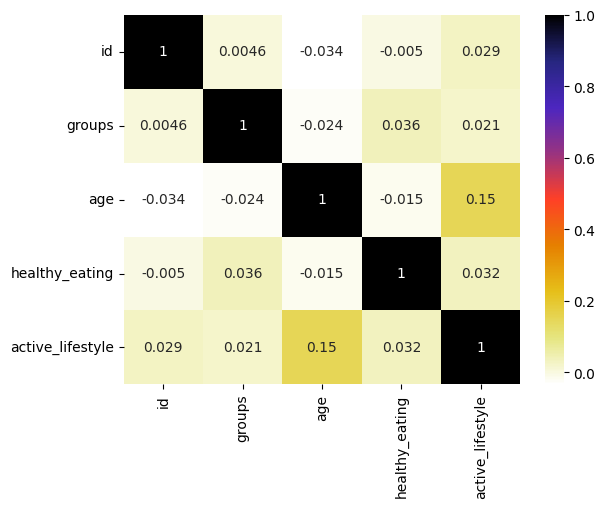

In [37]:
a=df.drop('salary',axis=1) 
sns.heatmap(a.corr(),annot=True,cmap=plt.cm.CMRmap_r)

#### Since the mutual correlations are very low we can consider each features

### Splitting our dataset using train test split

In [47]:
from sklearn.model_selection import train_test_split
X=df.drop('salary',axis=1)
y=df['salary']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Modeling

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [48]:
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [50]:
pred1=linear.predict(X_test)

In [56]:
MSE=mean_squared_error(y_test,pred1)
MAE=mean_absolute_error(y_test,pred1)
R2=r2_score(y_test,pred1)

In [57]:
R2

0.9032180190860339

In [60]:
np.sqrt(MSE)

344.2711150500748

In [59]:
MAE

247.82404782842877

# Decision Tree

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [71]:
tree1=DecisionTreeRegressor()

In [72]:
tree1.fit(X_train,y_train)

DecisionTreeRegressor()

In [73]:
pred2=tree1.predict(X_test)

In [74]:
r2_score(y_test,pred2)

0.9943317695763337

In [75]:
MSE=mean_squared_error(y_test,pred2)
MSE

6941.513333333333

In [76]:
np.sqrt(MSE)

83.31574481052986

In [77]:
MAE=mean_absolute_error(y_test,pred2)
MAE

16.28

[Text(0.5234883957654723, 0.9583333333333334, 'x[3] <= 5.5\nsquared_error = 1140379.653\nsamples = 700\nvalue = 2223.874'),
 Text(0.25748167752442996, 0.875, 'x[3] <= 3.5\nsquared_error = 388837.679\nsamples = 430\nvalue = 1562.935'),
 Text(0.08906758957654723, 0.7916666666666666, 'x[3] <= 0.5\nsquared_error = 187933.987\nsamples = 181\nvalue = 1128.729'),
 Text(0.03257328990228013, 0.7083333333333334, 'x[4] <= 5.5\nsquared_error = 145013.421\nsamples = 11\nvalue = 1899.818'),
 Text(0.019543973941368076, 0.625, 'x[4] <= 4.5\nsquared_error = 30141.44\nsamples = 5\nvalue = 1524.4'),
 Text(0.013029315960912053, 0.5416666666666666, 'x[0] <= 852.0\nsquared_error = 11960.889\nsamples = 3\nvalue = 1400.667'),
 Text(0.006514657980456026, 0.4583333333333333, 'squared_error = 0.0\nsamples = 2\nvalue = 1478.0'),
 Text(0.019543973941368076, 0.4583333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 1246.0'),
 Text(0.026058631921824105, 0.5416666666666666, 'squared_error = 0.0\nsamples = 2\nval

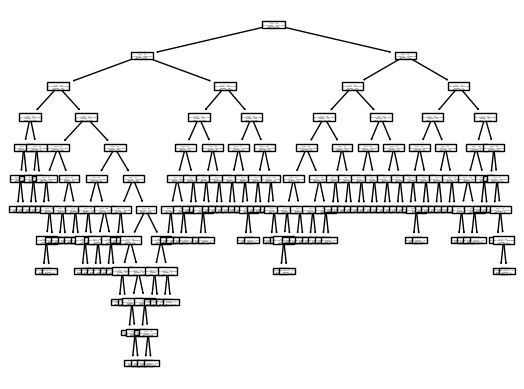

In [80]:
tree.plot_tree(tree1)

#### Here our decision tree regressor model got more accuracy so we choose decision tree regressor

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.pivot_table(columns=['Embarked','SibSp'],index='Sex',values='Survived',aggfunc='count')

Embarked     C                Q                     S                         \
SibSp        0     1    2     0    1    2    4      0     1     2     3    4   
Sex                                                                            
female    38.0  30.0  5.0  29.0  6.0  1.0  NaN  105.0  70.0   7.0  11.0  6.0   
male      71.0  23.0  1.0  30.0  5.0  2.0  4.0  333.0  75.0  12.0   5.0  8.0   

Embarked            
SibSp       5    8  
Sex                 
female    1.0  3.0  
male      4.0  4.0

In [17]:
pd.crosstab(df['Sex'],values=df['Survived'],aggfunc='count',columns=df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [18]:
import pandas as pd

# Sample DataFrame 1
data1 = {'ID': [1, 2, 3],
         'Name': ['Alice', 'Bob', 'Charlie']}
df1 = pd.DataFrame(data1)

# Sample DataFrame 2
data2 = {'ID': [4, 5, 6],
         'Name': ['David', 'Eva', 'Frank']}
df2 = pd.DataFrame(data2)


In [20]:
pd.concat([df1,df2],ignore_index=True)

,ID,Name
0,1,Alice
1,2,Bob
2,3,Charlie
3,4,David
4,5,Eva
5,6,Frank


In [21]:
import pandas as pd

# Sample DataFrame 1
data1 = {'ID': [1, 2, 3],
         'Name': ['Alice', 'Bob', 'Charlie']}
df1 = pd.DataFrame(data1)

# Sample DataFrame 2
data2 = {'ID': [2, 3, 4],
         'Age': [25, 30, 35]}
df2 = pd.DataFrame(data2)

# Merging DataFrames on the 'ID' column
merged_df = pd.merge(df1, df2, on='ID')

merged_df

,ID,Name,Age
0,2,Bob,25
1,3,Charlie,30


In [25]:
data1 = {'ID': [1, 2, 3],
         'Name': ['Alice', 'Bob', 'Charlie']}
df1 = pd.DataFrame(data1)

# Sample DataFrame 2
data2 = {'EmployeeID': [2, 3, 4],
         'Age': [25, 30, 35]}
df2 = pd.DataFrame(data2)
df1.join(df2,how='right')

,ID,Name,EmployeeID,Age
0,1,Alice,2,25
1,2,Bob,3,30
2,3,Charlie,4,35


In [30]:
pd.merge(df1,df2,right_on='ID',left_on='EmployeeID')

KeyError: 'ID'